# Netflix Calculation & Data Visualization
_"Top 5 Netflix Genre in NOV 2019"_


### Setup package
- Import necessary package
- Defines dataframe

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

### Setup dataframe
- Import filtered dataframe

In [3]:
df = pd.read_csv('Netflix_filtered.csv')
df.head(5)

,Unnamed: 0,index,country,date_added,release_year,rating,listed_in
0,0,11,United States,2019-11-29,2019,TV-PG,Reality TV
1,1,15,United States,2019-11-29,2019,TV-MA,Docuseries
2,2,16,United States,2019-11-28,2019,TV-PG,"Children & Family Movies, Dramas"
3,3,19,United States,2019-11-28,2019,TV-PG,TV Comedies
4,4,22,United States,2019-11-27,2019,TV-14,Docuseries


### Collect all genre on "listed_in"
- Split by Comma 
- Collect first column

In [32]:
#split 'listed-in' by comma
genre_list = df.listed_in.astype(str)

list1 = genre_list.str.split(',').str[0]
list1.head()

0                  Reality TV
1                  Docuseries
2    Children & Family Movies
3                 TV Comedies
4                  Docuseries
Name: listed_in, dtype: object

- Collect second column

In [5]:
list2 = genre_list.str.split(',').str[1]
list2 = list2.dropna()
list2.head()

2               Dramas
10          Docuseries
11       Sports Movies
12            Comedies
15     Romantic Movies
Name: listed_in, dtype: object

- Collect third column

In [10]:
list3 = genre_list.str.split(',').str[2]
list3 = list3.dropna()
list3.head()

12     Romantic Movies
21        LGBTQ Movies
29     Romantic Movies
Name: listed_in, dtype: object

- Merge & drop NaN value

In [38]:
subject = list1.append([list2, list3])
subject = subject.dropna().reset_index()
subject.head()

,index,listed_in
0,0,Reality TV
1,1,Docuseries
2,2,Children & Family Movies
3,3,TV Comedies
4,4,Docuseries


### Calculation
- Count same value on index

In [44]:
final = subject.groupby('listed_in').count()
final = final.sort_values(['index'], ascending=False)
final.head()

,index
listed_in,
Children & Family Movies,5
Documentaries,5
Stand-Up Comedy,4
Dramas,4
Comedies,3


### Data Visualization

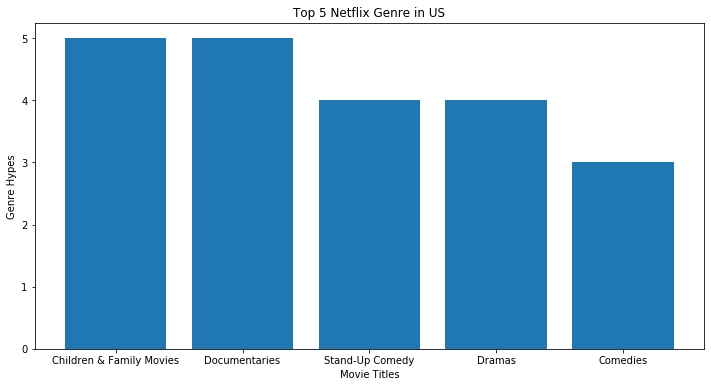

In [53]:
visual = final[0:5]
plt.figure(figsize=(12,6))

x=range(5)
plt.bar(x,visual['index'])
plt.xticks(x,['Children & Family Movies','Documentaries','Stand-Up Comedy', 'Dramas','Comedies'])
plt.xlabel('Movie Titles')
plt.ylabel('Genre Hypes')
plt.title('Top 5 Netflix Genre in US')
plt.show()